# Car residual value modelling (PoC)

## I. Importer les librairies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))
from src.models import DataPreprocessor, univariate_analysis, bivariate_analysis, multivariate_analysis
from plotly.subplots import make_subplots
import plotly.express as px
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.manifold import TSNE

## II. Data Preprocessing

### 1. Déclaration des chemins de data

In [2]:
# Le chemin vers les données d'annonce
annonce_path = os.path.join("..", "data", "raw_data", "autohero.csv")

# Le chemin vers les données de prix neuf
prix_neuf_path = os.path.join("..", "data", "scraping_prix_neuf", "prix_neuf_voitures_vf.csv")

### 2. Création d'une instance de Data Preprocessor

In [3]:
# Créer une instance de la classe DataPreprocessor
preprocessor = DataPreprocessor(file_path=annonce_path)

### 3. Charger les données d'annonces & les prétransformer

In [4]:
# Charger les données
preprocessor.load_data()
# Afficher la dimension du DataFrame
print(f"La dimension du DataFrame est: {preprocessor.data.shape}") 
preprocessor.data.head()

Data loaded successfully from ..\data\raw_data\autohero.csv
La dimension du DataFrame est: (2352, 20)


,scraped_at,modele,finition,prix,annee_mise_en_circulation,kilometrage,carburant,transmission,puissance,nb_ancien_proprietaire,classe_vehicule,nb_porte,nb_place,couleur,sellerie,classe_emission,emission_CO2,crit_air,usage_commerciale_anterieure,url_annonce
0,2025-04-09,Ford Fiesta,1.0 EcoBoost ST-Line X,13 190 €,15.05.2020,69 301 km,Essence,Boite de vitesse manuelle,95 CV / 70 kW,3,Citadine,5.0,5.0,Gris,Tissu (Sellerie d'origine),EURO 6,NaN,Crit'Air 1,NaN,https://www.autohero.com/fr/ford-fiesta/id/516...
1,2025-04-09,Toyota ProAce,Combi Long 1.5 D-4D Dynamic,23 990 €,29.04.2021,71 887 km,Diesel,Boite de vitesse manuelle,120 CV / 88 kW,2,Monospace,4.0,9.0,Gris,Tissu (Sellerie d'origine),EURO 6,170 g/km,Crit'Air 2,Oui,https://www.autohero.com/fr/toyota-pro-ace/id/...
2,2025-04-09,Mercedes-Benz GLA,250 e AMG Line 8G-DCT,32 490 €,23.10.2020,59 649 km,Hybride,Double embrayage / DCT,218 CV / 160 kW,2,SUV,5.0,5.0,Gris,Mi-cuir (Sellerie d'origine),EURO 6,32 g/km,Crit'Air 1,Oui,https://www.autohero.com/fr/mercedes-benz-gla/...
3,2025-04-09,BMW X1,sDrive18i xLine DKG7,27 890 €,05.05.2021,37 869 km,Essence,Double embrayage / DCT,136 CV / 100 kW,2,SUV,5.0,5.0,Noir,Mi-cuir (Sellerie d'origine),EURO 6,148 g/km,Crit'Air 1,Non,https://www.autohero.com/fr/bmw-x-1/id/490f203...
4,2025-04-09,Peugeot 3008,1.5 Blue-HDi Crossway EAT8,19 090 €,31.12.2019,58 958 km,Diesel,Boite de vitesse automatique,130 CV / 96 kW,3,SUV,5.0,5.0,Blanc,Mi-cuir (Sellerie d'origine),EURO 6,98 g/km,Crit'Air 2,Oui,https://www.autohero.com/fr/peugeot-3008/id/df...


In [5]:
# Prétransformer les données en ajoutant les nouvelles colonnes et homogénéisant les données
preprocessor.pretransform_data()
print(f"Après la pré-transformation, la nouvelle dimension est: {preprocessor.data.shape}")
preprocessor.data.head() 

Après la pré-transformation, la nouvelle dimension est: (2352, 30)


,scraped_at,marque,modele,finition,prix,annee_mise_en_circulation,kilometrage,carburant,transmission,puissance,...,url_annonce,annee,age_days,age_years,age_months,km_per_year,km_per_month,modele_alt,finition_puissance,id_annonce
0,2025-04-09,FORD,FORD FIESTA,1.0 ECOBOOST ST-LINE X,13190.0,15.05.2020,69301.0,Essence,Boite de vitesse manuelle,95,...,https://www.autohero.com/fr/ford-fiesta/id/516...,2020,1790.0,4.9,59.7,14143.1,1160.8,FORD FIESTA,1.0 ECOBOOST ST-LINE X 95 CV,1
1,2025-04-09,TOYOTA,TOYOTA PROACE,COMBI LONG 1.5 D-4D DYNAMIC,23990.0,29.04.2021,71887.0,Diesel,Boite de vitesse manuelle,120,...,https://www.autohero.com/fr/toyota-pro-ace/id/...,2021,1441.0,3.9,48.0,18432.6,1497.6,TOYOTA PROACE,COMBI LONG 1.5 D-4D DYNAMIC 120 CV,2
2,2025-04-09,MERCEDES,MERCEDES-BENZ GLA,250 E AMG LINE 8G-DCT,32490.0,23.10.2020,59649.0,Hybride,Boite de vitesse automatique,218,...,https://www.autohero.com/fr/mercedes-benz-gla/...,2020,1629.0,4.5,54.3,13255.3,1098.5,MERCEDES-BENZ GLA,250 E AMG LINE 8G-DCT 218 CV,3
3,2025-04-09,BMW,BMW X1,SDRIVE18I XLINE DKG7,27890.0,05.05.2021,37869.0,Essence,Boite de vitesse automatique,136,...,https://www.autohero.com/fr/bmw-x-1/id/490f203...,2021,1435.0,3.9,47.8,9710.0,792.2,BMW X1,SDRIVE18I XLINE DKG7 136 CV,4
4,2025-04-09,PEUGEOT,PEUGEOT 3008,1.5 BLUE-HDI CROSSWAY EAT8,19090.0,31.12.2019,58958.0,Diesel,Boite de vitesse automatique,130,...,https://www.autohero.com/fr/peugeot-3008/id/df...,2019,1926.0,5.3,64.2,11124.2,918.3,PEUGEOT 3008,1.5 BLUE-HDI CROSSWAY EAT8 130 CV,5


### 4. Récupération des prix neuf

In [6]:
# Récupérer le prix neuf
preprocessor.merge_new_price(prix_neuf_path)
print(f"Après la récupération du prix neuf, la nouvelle dimension est: {preprocessor.data.shape}") 
preprocessor.data.head()

Après la récupération du prix neuf, la nouvelle dimension est: (6812, 52)


,scraped_at,marque,modele,finition,prix,annee_mise_en_circulation,kilometrage,carburant,transmission,puissance,...,np_energie,np_prix_neuf,np_version_finale,note_version_commune,note_transmission_commune,note_carburant_commun,note_nb_porte_commun,note_totale_commune,max_note,nb_match_par_annonce
0,2025-04-09,FORD,FORD FIESTA,1.0 ECOBOOST ST-LINE X,13190.0,15.05.2020,69301.0,Essence,Boite de vitesse manuelle,95,...,Essence,21650,FORD FIESTA 6 VI 1.0 ECOBOOST 95 S/S ST-LINE X 3P,5,1,1,0,7,7,2
1,2025-04-09,FORD,FORD FIESTA,1.0 ECOBOOST ST-LINE X,13190.0,15.05.2020,69301.0,Essence,Boite de vitesse manuelle,95,...,Essence,21650,FORD FIESTA 6 VI 1.0 ECOBOOST 95 S/S ST-LINE X 5P,5,1,1,0,7,7,2
2,2025-04-09,TOYOTA,TOYOTA PROACE,COMBI LONG 1.5 D-4D DYNAMIC,23990.0,29.04.2021,71887.0,Diesel,Boite de vitesse manuelle,120,...,Diesel,34290,TOYOTA PROACE 2 II (2) COMBI LONG 1.5 120 D-4D...,6,1,1,0,8,8,2
3,2025-04-09,TOYOTA,TOYOTA PROACE,COMBI LONG 1.5 D-4D DYNAMIC,23990.0,29.04.2021,71887.0,Diesel,Boite de vitesse manuelle,120,...,Diesel,34240,TOYOTA PROACE 2 II (2) PROACE COMBI LONG 1.5 1...,6,1,1,0,8,8,2
4,2025-04-09,MERCEDES,MERCEDES-BENZ GLA,250 E AMG LINE 8G-DCT,32490.0,23.10.2020,59649.0,Hybride,Boite de vitesse automatique,218,...,Hybride,55600,MERCEDES GLA 2 II 250 E AMG LINE 8G-DCT,5,1,1,0,7,7,1


In [7]:
print(f"Nombre total d'annonces: {preprocessor.data['id_annonce'].drop_duplicates().shape[0]}")
print(f"Nombre d'annonces où le prix neuf est renseigné: {preprocessor.data[preprocessor.data['np_prix_neuf'].notnull()][['id_annonce']].drop_duplicates().shape[0]}")
print(f"Nombre d'annonces où le prix neuf n'est pas trouvé: {preprocessor.data[preprocessor.data['np_prix_neuf'].isnull()][['id_annonce']].drop_duplicates().shape[0]}")

Nombre total d'annonces: 2352
Nombre d'annonces où le prix neuf est renseigné: 2339
Nombre d'annonces où le prix neuf n'est pas trouvé: 13


In [8]:
# Annonces dont le prix neuf est manquant
df = preprocessor.data.copy()
df_miss_prix = df[df["np_prix_neuf"].isnull()]
df_miss_prix.value_counts(subset=['modele', 'modele_alt'])

modele                    modele_alt
CITROEN C4 GRAND PICASSO  C4 PICASSO    1
CITROEN C4 PICASSO        C4 PICASSO    1
KIA PRO_CEE'D             PROCEED       1
Name: count, dtype: int64

In [9]:
df_miss_prix

,scraped_at,marque,modele,finition,prix,annee_mise_en_circulation,kilometrage,carburant,transmission,puissance,...,np_energie,np_prix_neuf,np_version_finale,note_version_commune,note_transmission_commune,note_carburant_commun,note_nb_porte_commun,note_totale_commune,max_note,nb_match_par_annonce
1077,2025-04-09,CITROEN,CITROEN C4 PICASSO,(2) 1.2 PURETECH SHINE EAT6,11690.0,24.04.2019,65767.0,Essence,Boite de vitesse automatique,130,...,NaN,NaN,NaN,0,0,0,0,0,0,1
2105,2025-04-09,CITROEN,CITROEN C4 GRAND PICASSO,1.2 PURETECH SHINE BV6,10590.0,31.05.2019,87702.0,Essence,Boite de vitesse manuelle,130,...,NaN,NaN,NaN,0,0,0,0,0,0,1
2108,2025-04-09,KIA,KIA PRO_CEE'D,1.0 T-GDI ISG GT-LINE BV6,10790.0,16.03.2017,84553.0,Essence,Boite de vitesse manuelle,120,...,NaN,NaN,NaN,0,0,0,0,0,0,1
2364,2025-04-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,...,NaN,NaN,NaN,0,0,0,0,0,0,1
2823,2025-04-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,...,NaN,NaN,NaN,0,0,0,0,0,0,1
3015,2025-04-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,...,NaN,NaN,NaN,0,0,0,0,0,0,1
4441,2025-04-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,...,NaN,NaN,NaN,0,0,0,0,0,0,1
5086,2025-04-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,...,NaN,NaN,NaN,0,0,0,0,0,0,1
5408,2025-04-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,...,NaN,NaN,NaN,0,0,0,0,0,0,1
5638,2025-04-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,...,NaN,NaN,NaN,0,0,0,0,0,0,1


13 sur 2352 lignes où le prix neuf est introuvable, dont 10 annonces vides.  
Vu le nombre non significatif de manquants => les exclure de la base de travail

In [10]:
preprocessor.data = preprocessor.data[preprocessor.data['np_prix_neuf'].notnull()]
print(f"Nombre total d'annonces restant: {preprocessor.data['id_annonce'].drop_duplicates().shape[0]}")

Nombre total d'annonces restant: 2339


In [11]:
preprocessor.data.head()

,scraped_at,marque,modele,finition,prix,annee_mise_en_circulation,kilometrage,carburant,transmission,puissance,...,np_energie,np_prix_neuf,np_version_finale,note_version_commune,note_transmission_commune,note_carburant_commun,note_nb_porte_commun,note_totale_commune,max_note,nb_match_par_annonce
0,2025-04-09,FORD,FORD FIESTA,1.0 ECOBOOST ST-LINE X,13190.0,15.05.2020,69301.0,Essence,Boite de vitesse manuelle,95,...,Essence,21650,FORD FIESTA 6 VI 1.0 ECOBOOST 95 S/S ST-LINE X 3P,5,1,1,0,7,7,2
1,2025-04-09,FORD,FORD FIESTA,1.0 ECOBOOST ST-LINE X,13190.0,15.05.2020,69301.0,Essence,Boite de vitesse manuelle,95,...,Essence,21650,FORD FIESTA 6 VI 1.0 ECOBOOST 95 S/S ST-LINE X 5P,5,1,1,0,7,7,2
2,2025-04-09,TOYOTA,TOYOTA PROACE,COMBI LONG 1.5 D-4D DYNAMIC,23990.0,29.04.2021,71887.0,Diesel,Boite de vitesse manuelle,120,...,Diesel,34290,TOYOTA PROACE 2 II (2) COMBI LONG 1.5 120 D-4D...,6,1,1,0,8,8,2
3,2025-04-09,TOYOTA,TOYOTA PROACE,COMBI LONG 1.5 D-4D DYNAMIC,23990.0,29.04.2021,71887.0,Diesel,Boite de vitesse manuelle,120,...,Diesel,34240,TOYOTA PROACE 2 II (2) PROACE COMBI LONG 1.5 1...,6,1,1,0,8,8,2
4,2025-04-09,MERCEDES,MERCEDES-BENZ GLA,250 E AMG LINE 8G-DCT,32490.0,23.10.2020,59649.0,Hybride,Boite de vitesse automatique,218,...,Hybride,55600,MERCEDES GLA 2 II 250 E AMG LINE 8G-DCT,5,1,1,0,7,7,1


In [12]:
# Changer le format du prix neuf
preprocessor.data['np_prix_neuf'] = preprocessor.data['np_prix_neuf'].astype(float)
# Calculer le prix neuf moyen par annonce avant et après la suppression des outliers (méthode interquartile range)
preprocessor.fix_new_price()

Nombre d'annonces: 2339
Nombre d'annonces avec prix neuf moyen avant suppression des outliers < prix d'occasion: 2
Nombre d'annonces avec prix neuf moyen après suppression des outliers < prix d'occasion: 2


,scraped_at,marque,modele,finition,prix,annee_mise_en_circulation,kilometrage,carburant,transmission,puissance,...,note_carburant_commun,note_nb_porte_commun,note_totale_commune,max_note,nb_match_par_annonce,np_prix_neuf_moy,np_prix_neuf_median,prix_neuf_moyen_iqr,ratio_vr,ratio_vr_iqr
0,2025-04-09,FORD,FORD FIESTA,1.0 ECOBOOST ST-LINE X,13190.0,15.05.2020,69301.0,Essence,Boite de vitesse manuelle,95,...,1,0,7,7,2,21650.0,21650.0,21650.0,0.609238,0.609238
1,2025-04-09,FORD,FORD FIESTA,1.0 ECOBOOST ST-LINE X,13190.0,15.05.2020,69301.0,Essence,Boite de vitesse manuelle,95,...,1,0,7,7,2,21650.0,21650.0,21650.0,0.609238,0.609238
2,2025-04-09,TOYOTA,TOYOTA PROACE,COMBI LONG 1.5 D-4D DYNAMIC,23990.0,29.04.2021,71887.0,Diesel,Boite de vitesse manuelle,120,...,1,0,8,8,2,34265.0,34265.0,34265.0,0.700131,0.700131
3,2025-04-09,TOYOTA,TOYOTA PROACE,COMBI LONG 1.5 D-4D DYNAMIC,23990.0,29.04.2021,71887.0,Diesel,Boite de vitesse manuelle,120,...,1,0,8,8,2,34265.0,34265.0,34265.0,0.700131,0.700131
4,2025-04-09,MERCEDES,MERCEDES-BENZ GLA,250 E AMG LINE 8G-DCT,32490.0,23.10.2020,59649.0,Hybride,Boite de vitesse automatique,218,...,1,0,7,7,1,55600.0,55600.0,55600.0,0.584353,0.584353
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6794,2025-04-09,BMW,BMW SÉRIE 1,118I M SPORT DKG7,24990.0,15.12.2020,68713.0,Essence,Boite de vitesse automatique,136,...,1,0,6,6,1,39000.0,39000.0,39000.0,0.640769,0.640769
6795,2025-04-09,BMW,BMW SÉRIE 1,116I M SPORT ULTIMATE,17190.0,29.08.2018,78976.0,Essence,Boite de vitesse manuelle,109,...,1,0,6,6,2,30575.0,30575.0,30575.0,0.562224,0.562224
6796,2025-04-09,BMW,BMW SÉRIE 1,116I M SPORT ULTIMATE,17190.0,29.08.2018,78976.0,Essence,Boite de vitesse manuelle,109,...,1,0,6,6,2,30575.0,30575.0,30575.0,0.562224,0.562224
6797,2025-04-09,RENAULT,RENAULT SCENIC,1.3 TCE SL LIMITED,19990.0,20.04.2021,6321.0,Essence,Boite de vitesse manuelle,140,...,1,0,7,7,2,32300.0,32300.0,32300.0,0.618885,0.618885


Moyennes des prix neufs par annonce avant et après suppression des outliers sont assez identiques  
=> <b> Pour simplicité: Retenir le prix neuf moyen avant suppression des outliers </b>

In [13]:
# Focus sur les annonces où le prix neuf est inférieur au prix de l'annonce
preprocessor.data[(preprocessor.data["np_prix_neuf_moy"] < preprocessor.data["prix"])
                  | (preprocessor.data["prix_neuf_moyen_iqr"] < preprocessor.data["prix"])]

,scraped_at,marque,modele,finition,prix,annee_mise_en_circulation,kilometrage,carburant,transmission,puissance,...,note_carburant_commun,note_nb_porte_commun,note_totale_commune,max_note,nb_match_par_annonce,np_prix_neuf_moy,np_prix_neuf_median,prix_neuf_moyen_iqr,ratio_vr,ratio_vr_iqr
38,2025-04-09,DACIA,DACIA SANDERO,STEPWAY 1.0 TCE,13490.0,24.08.2020,6560.0,Essence,Boite de vitesse manuelle,100,...,1,0,6,6,1,13390.0,13390.0,13390.0,1.007468,1.007468
295,2025-04-09,DACIA,DACIA SANDERO,1.0 TCE EXPRESSION CVT,17790.0,19.04.2023,8092.0,Essence,Boite de vitesse automatique,91,...,1,0,6,6,2,17250.0,17250.0,17250.0,1.031304,1.031304
296,2025-04-09,DACIA,DACIA SANDERO,1.0 TCE EXPRESSION CVT,17790.0,19.04.2023,8092.0,Essence,Boite de vitesse automatique,91,...,1,0,6,6,2,17250.0,17250.0,17250.0,1.031304,1.031304


In [14]:
# 2 annonces où le prix neuf est inférieur au prix de l'annonce
# Les supprimer
preprocessor.data = preprocessor.data[(preprocessor.data["np_prix_neuf_moy"] >= preprocessor.data["prix"])]
preprocessor.data.shape

(6796, 57)

In [15]:
# Renommer la colonne np_prix_neuf_moy en prix_neuf
preprocessor.data.rename(columns={'np_prix_neuf_moy': 'prix_neuf'}, inplace=True)

C:\Users\Hong-CuongLE\AppData\Local\Temp\ipykernel_2532\3084189371.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [16]:
print(f"Après la suppression des annonces où le prix neuf est inférieur au prix de l'annonce, le nombre d'annonces restantes est: \
      {preprocessor.data['id_annonce'].drop_duplicates().shape[0]}")

Après la suppression des annonces où le prix neuf est inférieur au prix de l'annonce, le nombre d'annonces restantes est:       2337


### 5. Traitement des valeurs manquantes

In [17]:
# Missing values per column
preprocessor.display_missing_values()

Missing values in each column:
emission_CO2                     645
crit_air                          10
usage_commerciale_anterieure     645
model_alternative               6547
match_type_annee                6547
dtype: int64


#### Emission de CO2

In [18]:
# Create a copy of the DataFrame first
data_copy = preprocessor.data.copy()

# Extract CO2 values and convert to float
data_copy.loc[:, 'co2_caradisiac'] = data_copy['CO2\n(g/km)'].str.extract(r'(\d+)').astype(float)

# Calculate mean CO2 per announcement
data_copy.loc[:, 'co2_caradisiac_moy'] = data_copy.groupby('id_annonce')['co2_caradisiac'].transform('mean')

# Fill missing CO2 emissions with calculated mean
data_copy.loc[:, 'emission_CO2'] = data_copy['emission_CO2'].fillna(data_copy['co2_caradisiac_moy'])

# Drop temporary columns
data_copy.drop(columns=['CO2\n(g/km)', 'co2_caradisiac', 'co2_caradisiac_moy'], inplace=True)

In [19]:
# Supprimer les doublons d'annonces
data_copy.drop_duplicates(subset=['id_annonce'], inplace=True)
# Liste des colonnes à supprimer
cols_to_drop = ['scraped_at', 'finition', 'annee_mise_en_circulation',
                'url_annonce', 'modele_alt', 'finition_puissance', 'np_url_prix_neuf',
                'modele_annee', 'model_alternative', 'match_type_annee', 'np_marque',
                'np_versions', 'np_model', 'np_version_selected', 'np_nb_porte', 'np_year',
                'np_boite', 'np_energie', 'np_prix_neuf', 'np_version_finale', 'note_version_commune',
                'note_transmission_commune', 'note_carburant_commun', 'note_nb_porte_commun', 'note_totale_commune',
                'max_note', 'nb_match_par_annonce', 'np_prix_neuf_median', 'prix_neuf_moyen_iqr', 'ratio_vr_iqr']
data_copy.drop(columns=cols_to_drop, inplace=True)
print(f"La dimension des données après suppression des doublons et des colonnes inutiles est : {data_copy.shape}")

# Assign back to preprocessor
preprocessor.data = data_copy

# Display missing values
preprocessor.display_missing_values()

La dimension des données après suppression des doublons et des colonnes inutiles est : (2337, 26)
Missing values in each column:
emission_CO2                      1
crit_air                          5
usage_commerciale_anterieure    256
dtype: int64


In [20]:
preprocessor.data[preprocessor.data['emission_CO2'].isnull()]

,marque,modele,prix,kilometrage,carburant,transmission,puissance,nb_ancien_proprietaire,classe_vehicule,nb_porte,...,usage_commerciale_anterieure,annee,age_days,age_years,age_months,km_per_year,km_per_month,id_annonce,prix_neuf,ratio_vr
4151,RENAULT,RENAULT CLIO,16190.0,42382.0,Hybride,Boite de vitesse automatique,140,2,Citadine,5,...,NaN,2020,1744.0,4.8,58.1,8829.6,729.5,1467,26433.333333,0.612484


Il reste 1 annonce où le taux d'émission de CO2 est manquant  
Récupérer le taux d'émission moyen de la même marque, modele et type de carburant

In [21]:
# Imputer emission_CO2 avec la moyenne de même marque, modèle et carburant
preprocessor.data['emission_CO2'] = preprocessor.data.groupby(['marque', 'modele', 'carburant'])['emission_CO2'].transform(
    lambda x: x.fillna(x.mean())
)

In [22]:
# Re check missing values
preprocessor.display_missing_values()

Missing values in each column:
crit_air                          5
usage_commerciale_anterieure    256
dtype: int64


#### Crit-air

Remplir les valeurs manquantes en se basant sur:  
- Le type de carburant
- Classe d'émission (EURO 5, EURO 6, etc.)

In [23]:
# Distribution des crit-air, y compris les valeurs manquantes
preprocessor.data['crit_air'].value_counts(dropna=False)

crit_air
Crit'Air 1    1742
Crit'Air 2     590
NaN              5
Name: count, dtype: int64

In [24]:
# Focus sur les annonces où crit_air est manquant
df_crit_air_miss = preprocessor.data[preprocessor.data['crit_air'].isnull()]
df_crit_air_miss

,marque,modele,prix,kilometrage,carburant,transmission,puissance,nb_ancien_proprietaire,classe_vehicule,nb_porte,...,usage_commerciale_anterieure,annee,age_days,age_years,age_months,km_per_year,km_per_month,id_annonce,prix_neuf,ratio_vr
1085,SKODA,SKODA FABIA,15390.0,58873.0,Essence,Boite de vitesse automatique,110,2,Citadine,5,...,Non,2022,1002.0,2.7,33.4,21804.8,1762.7,406,24610.0,0.625356
2520,TOYOTA,TOYOTA YARIS,14890.0,45268.0,Hybride,Boite de vitesse automatique,100,1,Citadine,5,...,Non,2020,1763.0,4.8,58.8,9430.8,769.9,915,21660.5,0.687426
2861,PEUGEOT,PEUGEOT 208,10490.0,32516.0,Essence,Boite de vitesse manuelle,75,2,Citadine,5,...,Non,2022,999.0,2.7,33.3,12043.0,976.5,1025,21420.0,0.489729
5123,OPEL,OPEL CROSSLAND X,17190.0,18281.0,Essence,Boite de vitesse automatique,130,2,SUV,5,...,Oui,2023,799.0,2.2,26.6,8309.5,687.3,1764,30500.0,0.563607
5670,PEUGEOT,PEUGEOT 208,10490.0,32516.0,Essence,Boite de vitesse manuelle,75,2,Citadine,5,...,Non,2022,999.0,2.7,33.3,12043.0,976.5,1965,21420.0,0.489729


In [25]:
# Le crit-air trouvé sur les modèles équivalents
preprocessor.data[(preprocessor.data['modele'].isin(df_crit_air_miss['modele'])) 
                   & (preprocessor.data['carburant'].isin(df_crit_air_miss['carburant']))
                   & (preprocessor.data['crit_air']).notnull()][['modele', 'classe_emission', 'carburant', 'crit_air']].drop_duplicates()

,modele,classe_emission,carburant,crit_air
32,SKODA FABIA,EURO 6,Essence,Crit'Air 1
37,PEUGEOT 208,EURO 6,Essence,Crit'Air 1
40,OPEL CROSSLAND X,EURO 6,Essence,Crit'Air 1
189,TOYOTA YARIS,EURO 6,Hybride,Crit'Air 1
553,TOYOTA YARIS,EURO 6,Essence,Crit'Air 1


In [26]:
# Remplir les valeurs manquantes de crit_air avec le crit'air trouvé sur les modèles équivalents (utiliser mode)
preprocessor.data['crit_air'] = preprocessor.data.groupby(['marque', 'modele', 'carburant'])['crit_air'].transform(
    lambda x: x.fillna(x.mode()[0] if not x.mode().empty else np.nan)
)

In [27]:
# Recheck missing values after filling crit_air
preprocessor.display_missing_values()

Missing values in each column:
usage_commerciale_anterieure    256
dtype: int64


#### Usage commerciale antérieure

In [28]:
preprocessor.data['usage_commerciale_anterieure'].value_counts(dropna=False)

usage_commerciale_anterieure
Non                         1612
Oui                          464
NaN                          256
Oui, Location                  3
Oui, véhicule de société       2
Name: count, dtype: int64

In [29]:
# Si contenir "Oui" => usage_commerciale_anterieure = "Oui"
preprocessor.data.loc[preprocessor.data['usage_commerciale_anterieure'].str.lower().str.contains("oui", na=False), 'usage_commerciale_anterieure'] = "Oui"
# Si contenir "Non" => usage_commerciale_anterieure = "Non"
preprocessor.data.loc[preprocessor.data['usage_commerciale_anterieure'].str.lower().str.contains("non", na=False), 'usage_commerciale_anterieure'] = "Non"
# Si vide ou NaN => usage_commerciale_anterieure = "Unknown"
preprocessor.data.loc[preprocessor.data['usage_commerciale_anterieure'].isnull(), 'usage_commerciale_anterieure'] = "Unknown"

In [30]:
preprocessor.data['usage_commerciale_anterieure'].value_counts(dropna=False)

usage_commerciale_anterieure
Non        1612
Oui         469
Unknown     256
Name: count, dtype: int64

In [31]:
# Recheck missing values after filling crit_air
preprocessor.display_missing_values()

Missing values in each column:
Series([], dtype: int64)


Il n'y a plus de missing value

## III. Explanatory Data Analyses

In [32]:
# Créer une copie du DataFrame pour éviter de modifier l'original
df_preprocessed = preprocessor.data.copy()
# Sauvegarder le DataFrame prétraité
df_preprocessed.to_csv('../data/processed_data/preprocessed_data.csv', index=False)

In [33]:
df_preprocessed.head()

,marque,modele,prix,kilometrage,carburant,transmission,puissance,nb_ancien_proprietaire,classe_vehicule,nb_porte,...,usage_commerciale_anterieure,annee,age_days,age_years,age_months,km_per_year,km_per_month,id_annonce,prix_neuf,ratio_vr
0,FORD,FORD FIESTA,13190.0,69301.0,Essence,Boite de vitesse manuelle,95,3,Citadine,5,...,Unknown,2020,1790.0,4.9,59.7,14143.1,1160.8,1,21650.0,0.609238
2,TOYOTA,TOYOTA PROACE,23990.0,71887.0,Diesel,Boite de vitesse manuelle,120,2,Monospace,4,...,Oui,2021,1441.0,3.9,48.0,18432.6,1497.6,2,34265.0,0.700131
4,MERCEDES,MERCEDES-BENZ GLA,32490.0,59649.0,Hybride,Boite de vitesse automatique,218,2,SUV,5,...,Oui,2020,1629.0,4.5,54.3,13255.3,1098.5,3,55600.0,0.584353
5,BMW,BMW X1,27890.0,37869.0,Essence,Boite de vitesse automatique,136,2,SUV,5,...,Non,2021,1435.0,3.9,47.8,9710.0,792.2,4,41850.0,0.666428
6,PEUGEOT,PEUGEOT 3008,19090.0,58958.0,Diesel,Boite de vitesse automatique,130,3,SUV,5,...,Oui,2019,1926.0,5.3,64.2,11124.2,918.3,5,38650.0,0.493920


In [34]:
# Définition de la variable cible
target_variable = 'ratio_vr'

### 1. Analyses univariées

#### Variables catégorielles

In [35]:
# Liste des variables catégorielles
categorical_variables = df_preprocessed.select_dtypes(include=['object']).columns.tolist()

                             count unique                           top  freq
marque                        2337     34                       PEUGEOT   396
modele                        2337    221                  PEUGEOT 2008   115
carburant                     2337      4                       Essence  1562
transmission                  2337      2  Boite de vitesse automatique  1287
nb_ancien_proprietaire        2337      6                             2  1103
classe_vehicule               2337      9                           SUV  1028
nb_porte                      2337      4                             5  2156
nb_place                      2337      6                             5  2090
couleur                       2337     13                          Gris   847
sellerie                      2337      6    Tissu (Sellerie d'origine)  1157
classe_emission               2337      4                        EURO 6  2326
crit_air                      2337      2                    Cri

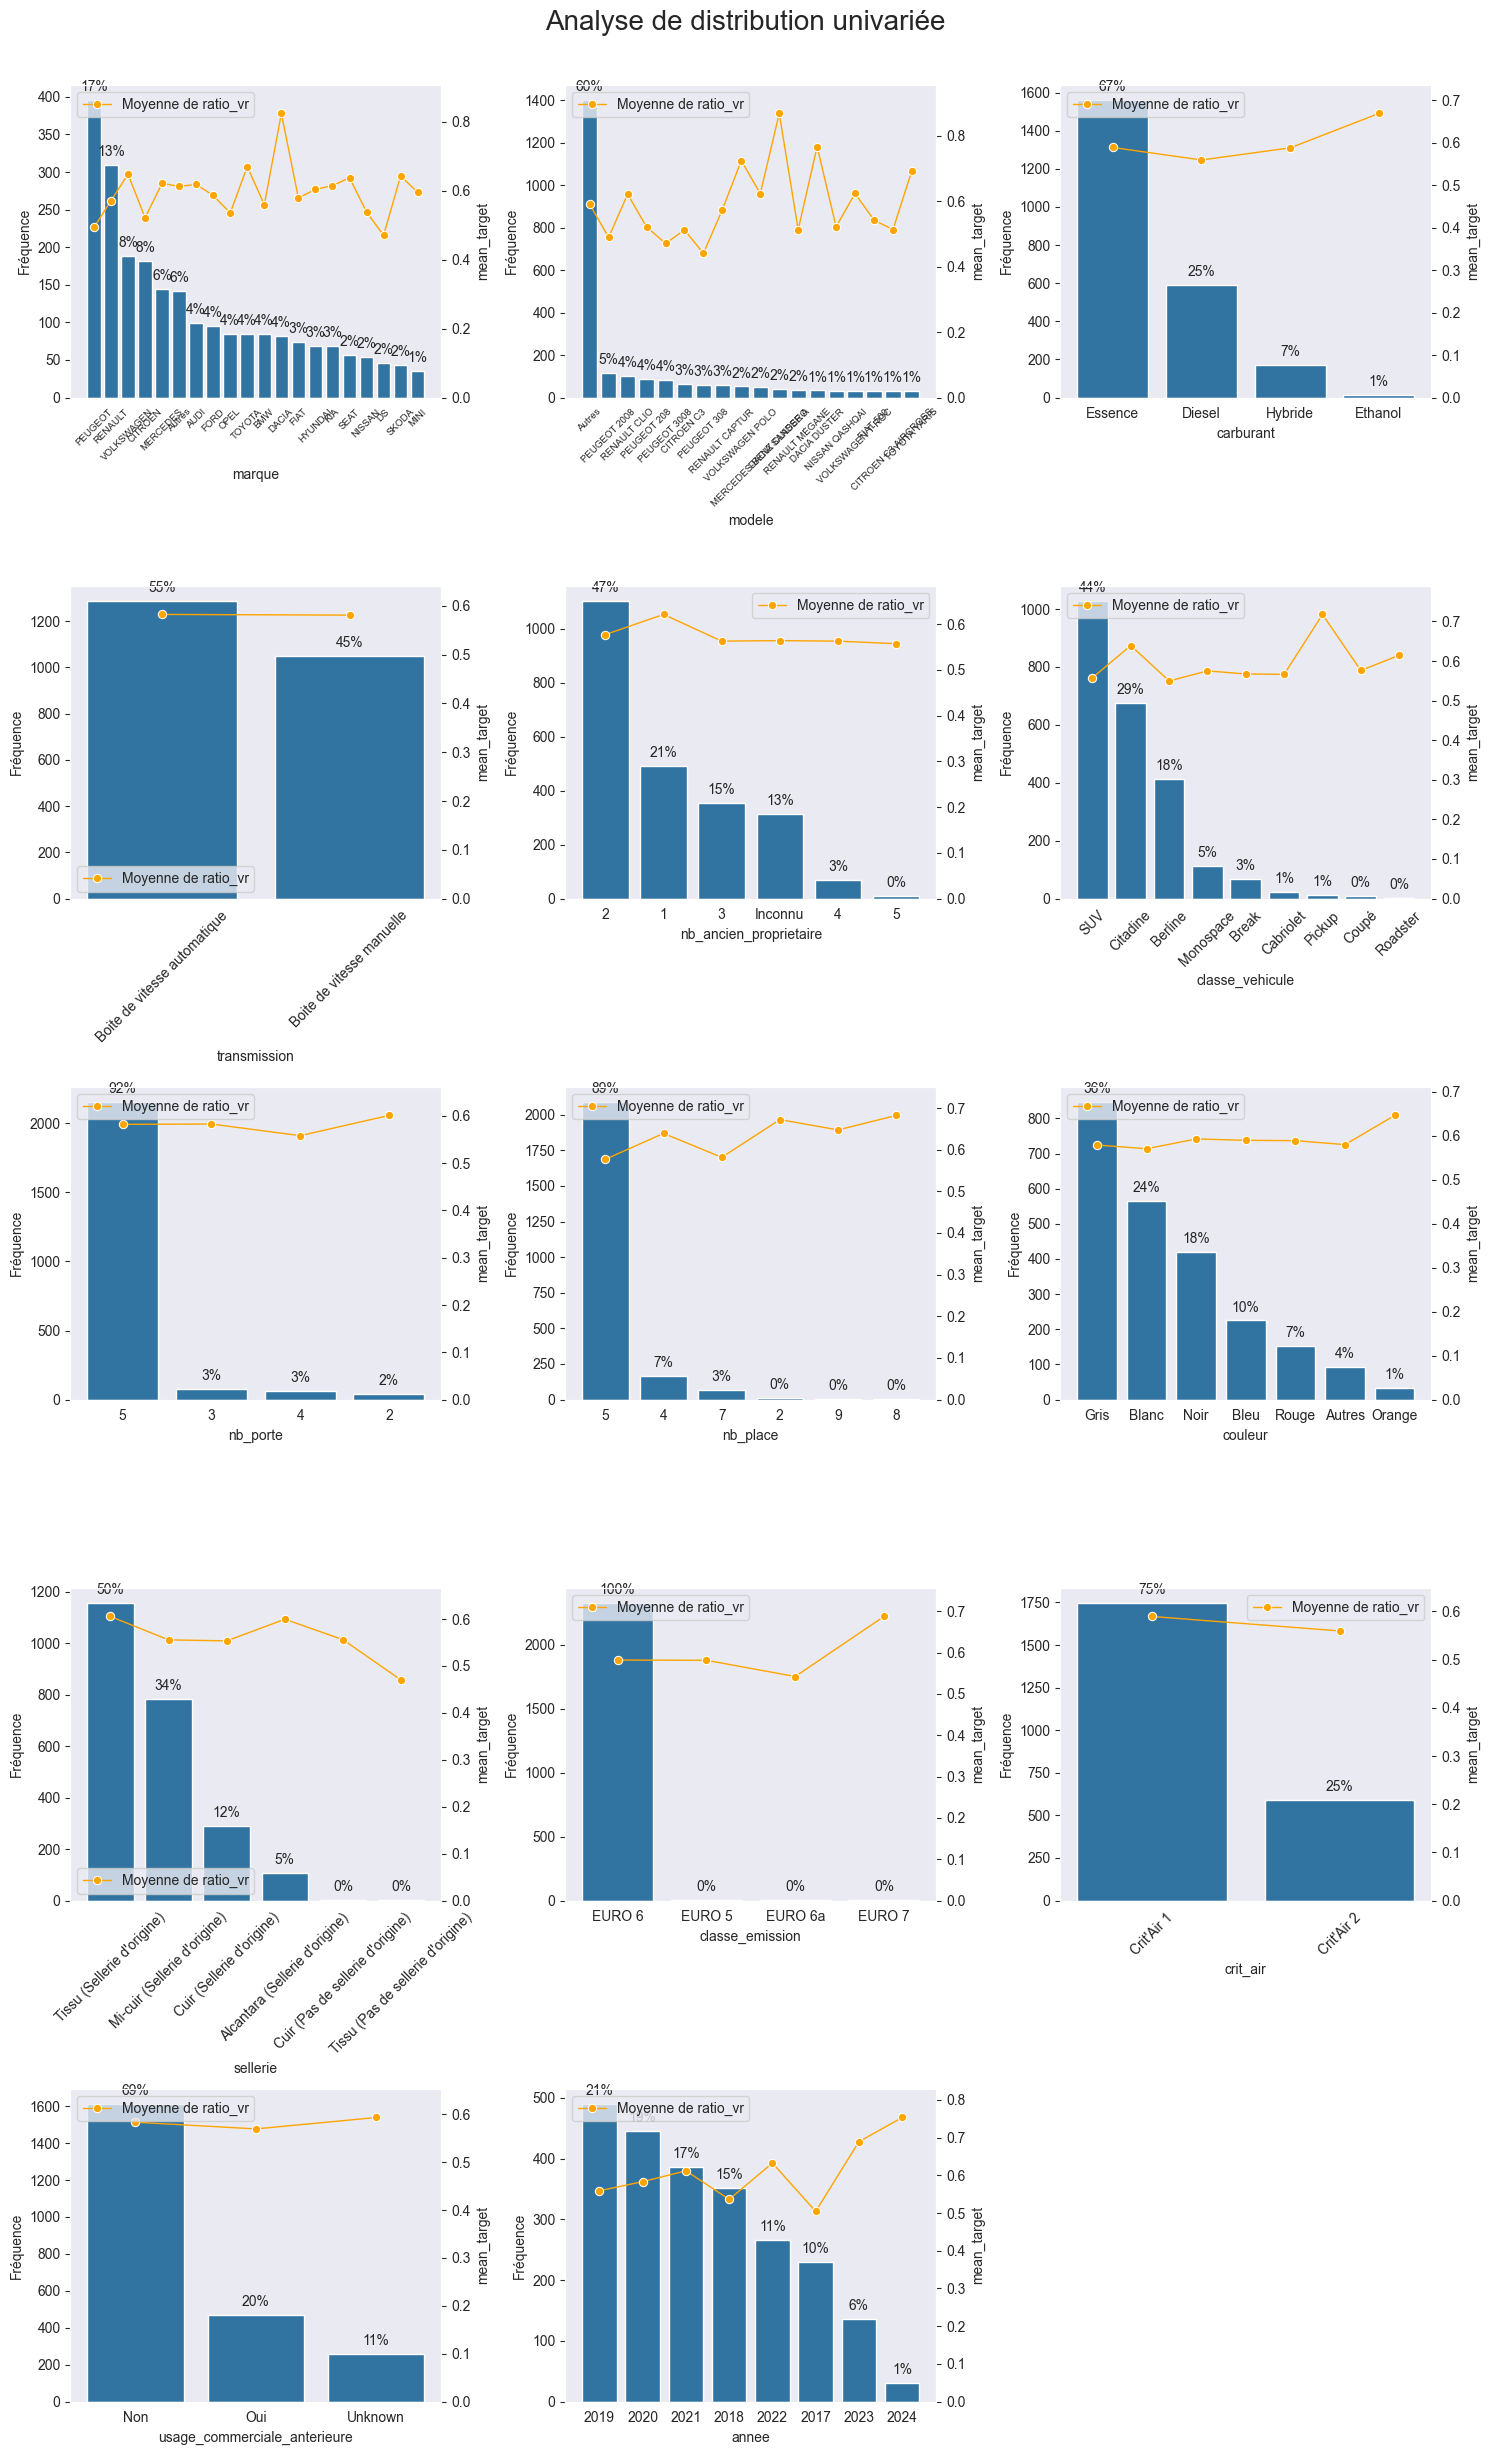

In [36]:
univariate_analysis(df_preprocessed, list_columns=categorical_variables, dtype="cat", target_column=target_variable)

<u><b> Conclusion </b></u>:  
N.B: "Autres" = regroupement des modalités qui ont moins de 30 observations, quand il y a plus de 10 catégories
- Marque: Il y a 34 marques différentes dans le dataset. La majorité contient des marques françaises: Peugeot, Renault  
- Modèle: 221 modèles différents toutes marques comprises. Pas forcément un certain modèle qui domine la répartition
- Carburant:  Il y a 4 types de carburant recensés dans le dataset. La grande majorité est "Essence" avec 67% des obs, suivie par "Diesel" (25%). Hybride et Ethanol représentent peu. Pas Electrique dans le dataset.  
- Boite de vitesse: assez équilibré entre Automatique et Manuelle, avec des fréquences relativement plus hautes en boite Automatique  
- Nombre d'ancien propriétaire: 1 ou 2 anciens propriétaies en général  
- Classe véhicule: la majorité est SUV, Citadine, Berline  
- Nombre de porte & nombre de place: presque à 5 portes & 5 places  => assez traditionnel  
- Couleur: Gris, Blanc et Noir sont majoritaires
- Sellerie: Tissu ou Mi-cuir en général
- Classe d'émisison: presque la totalité est EURO-6
- Critair: la grande majorité est en Critair 1, le reste en Critair 2  => Voitures relativement au norme  
- Usage commerciale antérieure: Non dans 70% des cas
- Année de mise en circulation: la majorité est entre 2018 et 2021, très peu de fréquence sur les années récentes (2023, 2024)

In [37]:
df_preprocessed['modele'].value_counts()

modele
PEUGEOT 2008        115
RENAULT CLIO        100
PEUGEOT 208          88
PEUGEOT 3008         82
CITROEN C3           63
                   ... 
VOLKSWAGEN CADDY      1
INFINITI Q30          1
OPEL ZAFIRA           1
FORD C-MAX            1
BMW Z4                1
Name: count, Length: 221, dtype: int64

#### Variables continues

In [38]:
# Liste des variables continues, y compris la variable cible
continuous_variables = df_preprocessed.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Supprimer des variables qui ne sont pas pertinentes pour l'analyse univariée
to_drop = ['id_annonce']
continuous_variables = [col for col in continuous_variables if col not in to_drop]

print(f"Liste des variables continues: {continuous_variables}")

Liste des variables continues: ['prix', 'kilometrage', 'puissance', 'emission_CO2', 'age_days', 'age_years', 'age_months', 'km_per_year', 'km_per_month', 'prix_neuf', 'ratio_vr']


               count          mean           std       min           25%  \
prix          2337.0   17533.51733   6598.728742    6890.0       12490.0   
kilometrage   2337.0  58226.963201  25376.292136     527.0       38570.0   
puissance     2337.0    127.985451     38.584332      65.0         102.0   
emission_CO2  2337.0    121.686482     23.777788      23.0         110.0   
age_days      2337.0   1810.976466    624.487895     146.0        1394.0   
age_years     2337.0       4.96089      1.710779       0.4           3.8   
age_months    2337.0     60.365811     20.815877       4.9          46.5   
km_per_year   2337.0  12241.311767   5349.493556     251.0        8783.7   
km_per_month  2337.0   1006.024647    439.572648      20.6         720.5   
prix_neuf     2337.0  30564.435379  10755.898891    9990.0  22216.666667   
ratio_vr      2337.0      0.581995      0.114309  0.289408      0.499749   

                   50%       75%      max  
prix           16490.0   20990.0  45590.0  

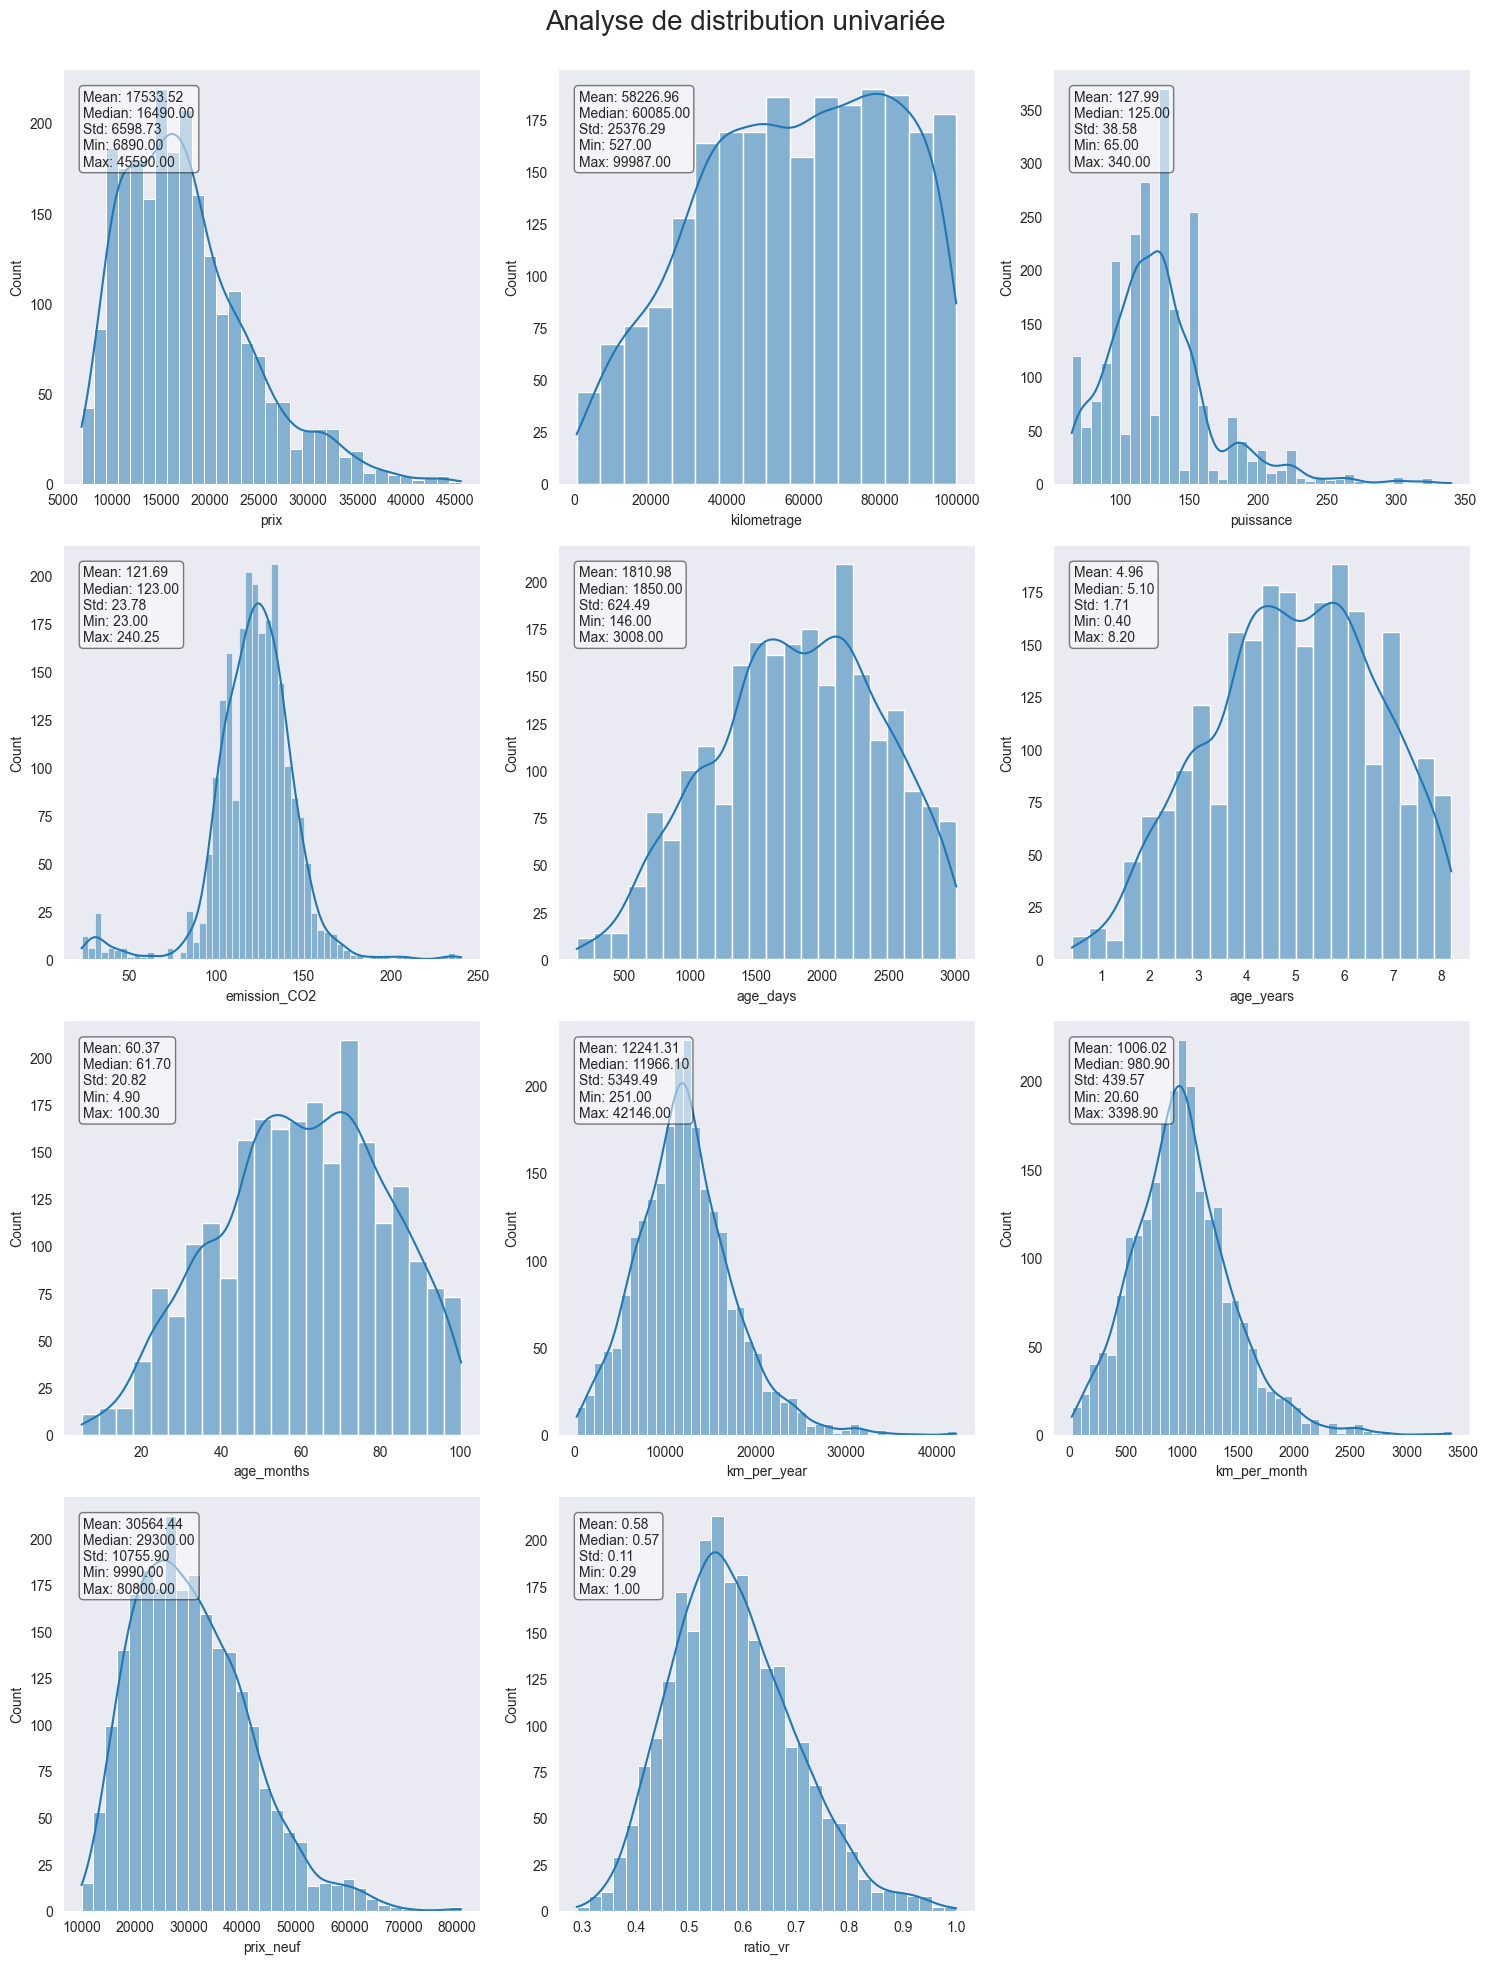

In [39]:
univariate_analysis(df_preprocessed, list_columns=continuous_variables, dtype="num")

La distribution de prix d'occasion est relativement asymétrique à droite  
Le ratio VR moyen est aux alentours de 58% et celui-ci est proche de la médiane

### 2. Target vs variables catégorielles

Statistiques de Target value pour marque :
            count      mean       std       min       25%       50%       75%  \
marque                                                                          
DACIA        82.0  0.823858  0.088977  0.645146  0.776301  0.817190  0.892016   
ABARTH        9.0  0.741357  0.045469  0.670633  0.720465  0.745070  0.780803   
SUZUKI       21.0  0.723932  0.077330  0.595601  0.668516  0.740342  0.771066   
SMART         4.0  0.718705  0.032672  0.697778  0.703037  0.704790  0.720458   
MG            1.0  0.714150       NaN  0.714150  0.714150  0.714150  0.714150   
TOYOTA       85.0  0.669638  0.094048  0.495565  0.608322  0.664894  0.702730   
CUPRA         4.0  0.655120  0.075249  0.581761  0.605470  0.642906  0.692556   
VOLKSWAGEN  188.0  0.647476  0.089755  0.436537  0.586962  0.639109  0.717481   
SKODA        43.0  0.642466  0.075356  0.515009  0.575128  0.625356  0.687543   
SEAT         57.0  0.637294  0.067745  0.522407  0.587657  0.62921

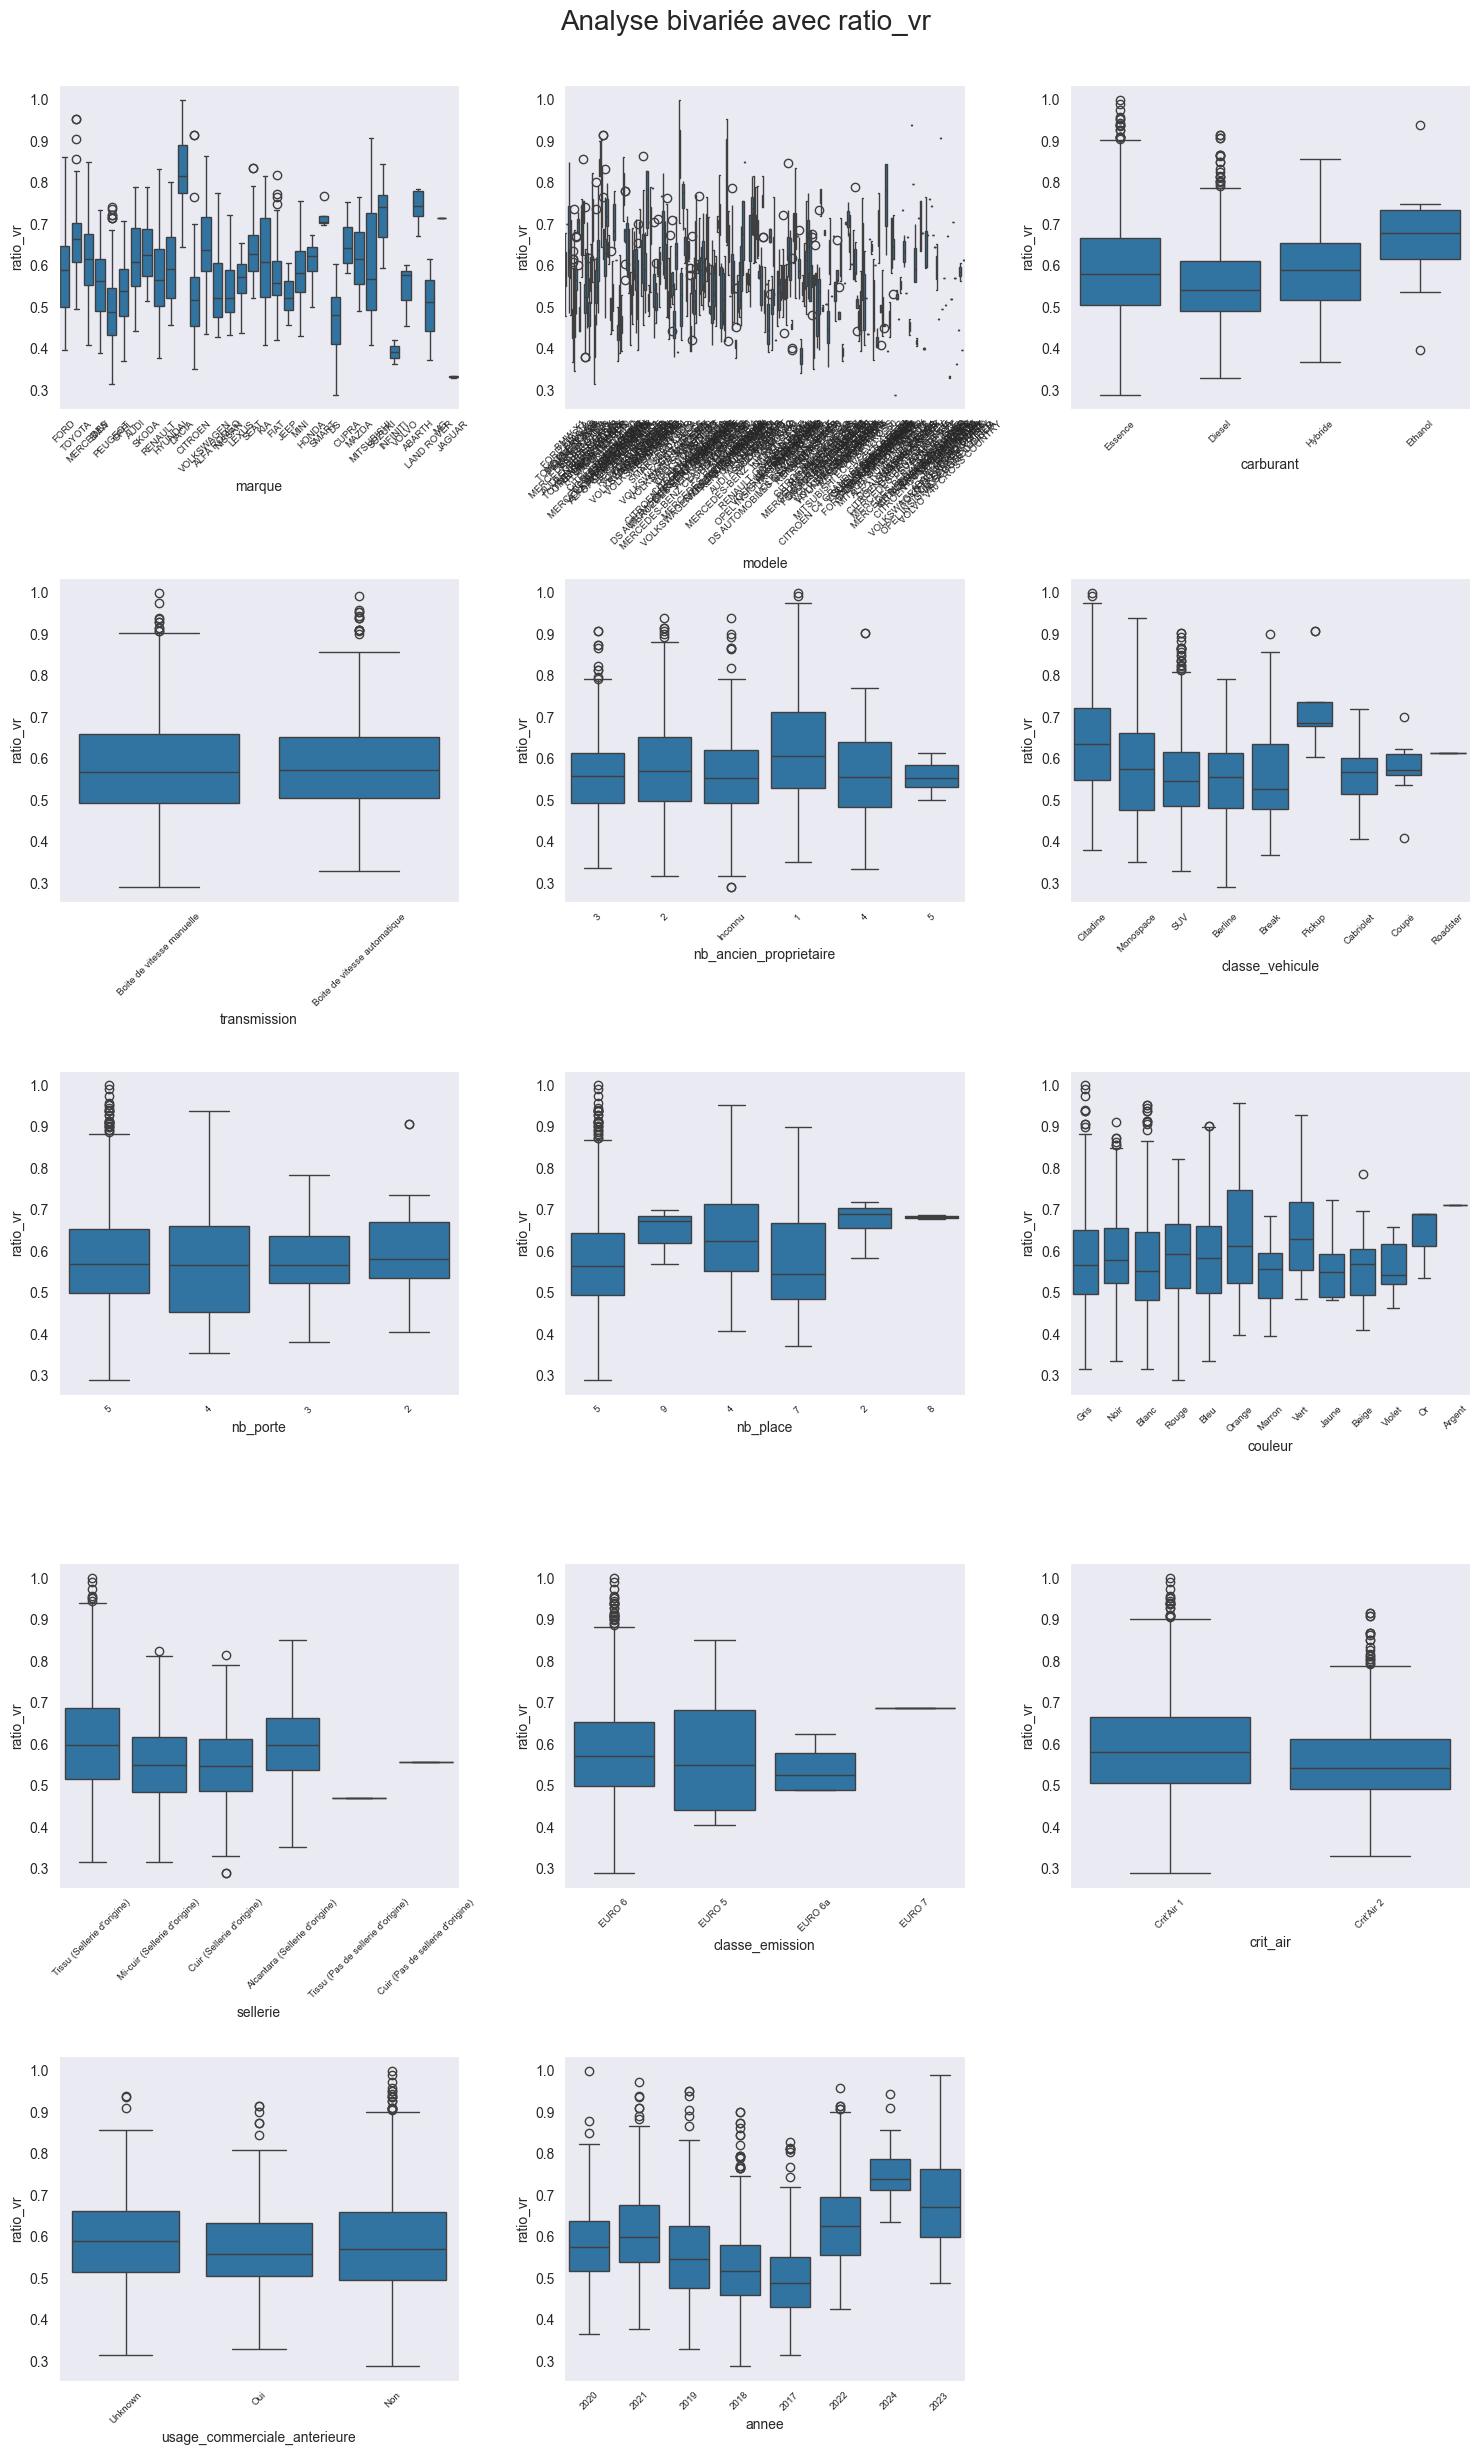

In [40]:
bivariate_analysis(df_preprocessed, list_columns=categorical_variables, dtype="cat", target_column=target_variable)

Les marques et modèles sont nombreux => Besoin potentiel de les regrouper ?
Le taux de VR est moyennement plus élevé sur les voitures d'essence que diesel  
Il n'y a pas forcément d'écart significatif de ratio VR moyen entre les voitures de boite auto et de boite manuelle.  
Les voitures qui ont 1 ancien propriétaire uniquement se vendent généralement plus cher  

### 3. Target vs variables continues

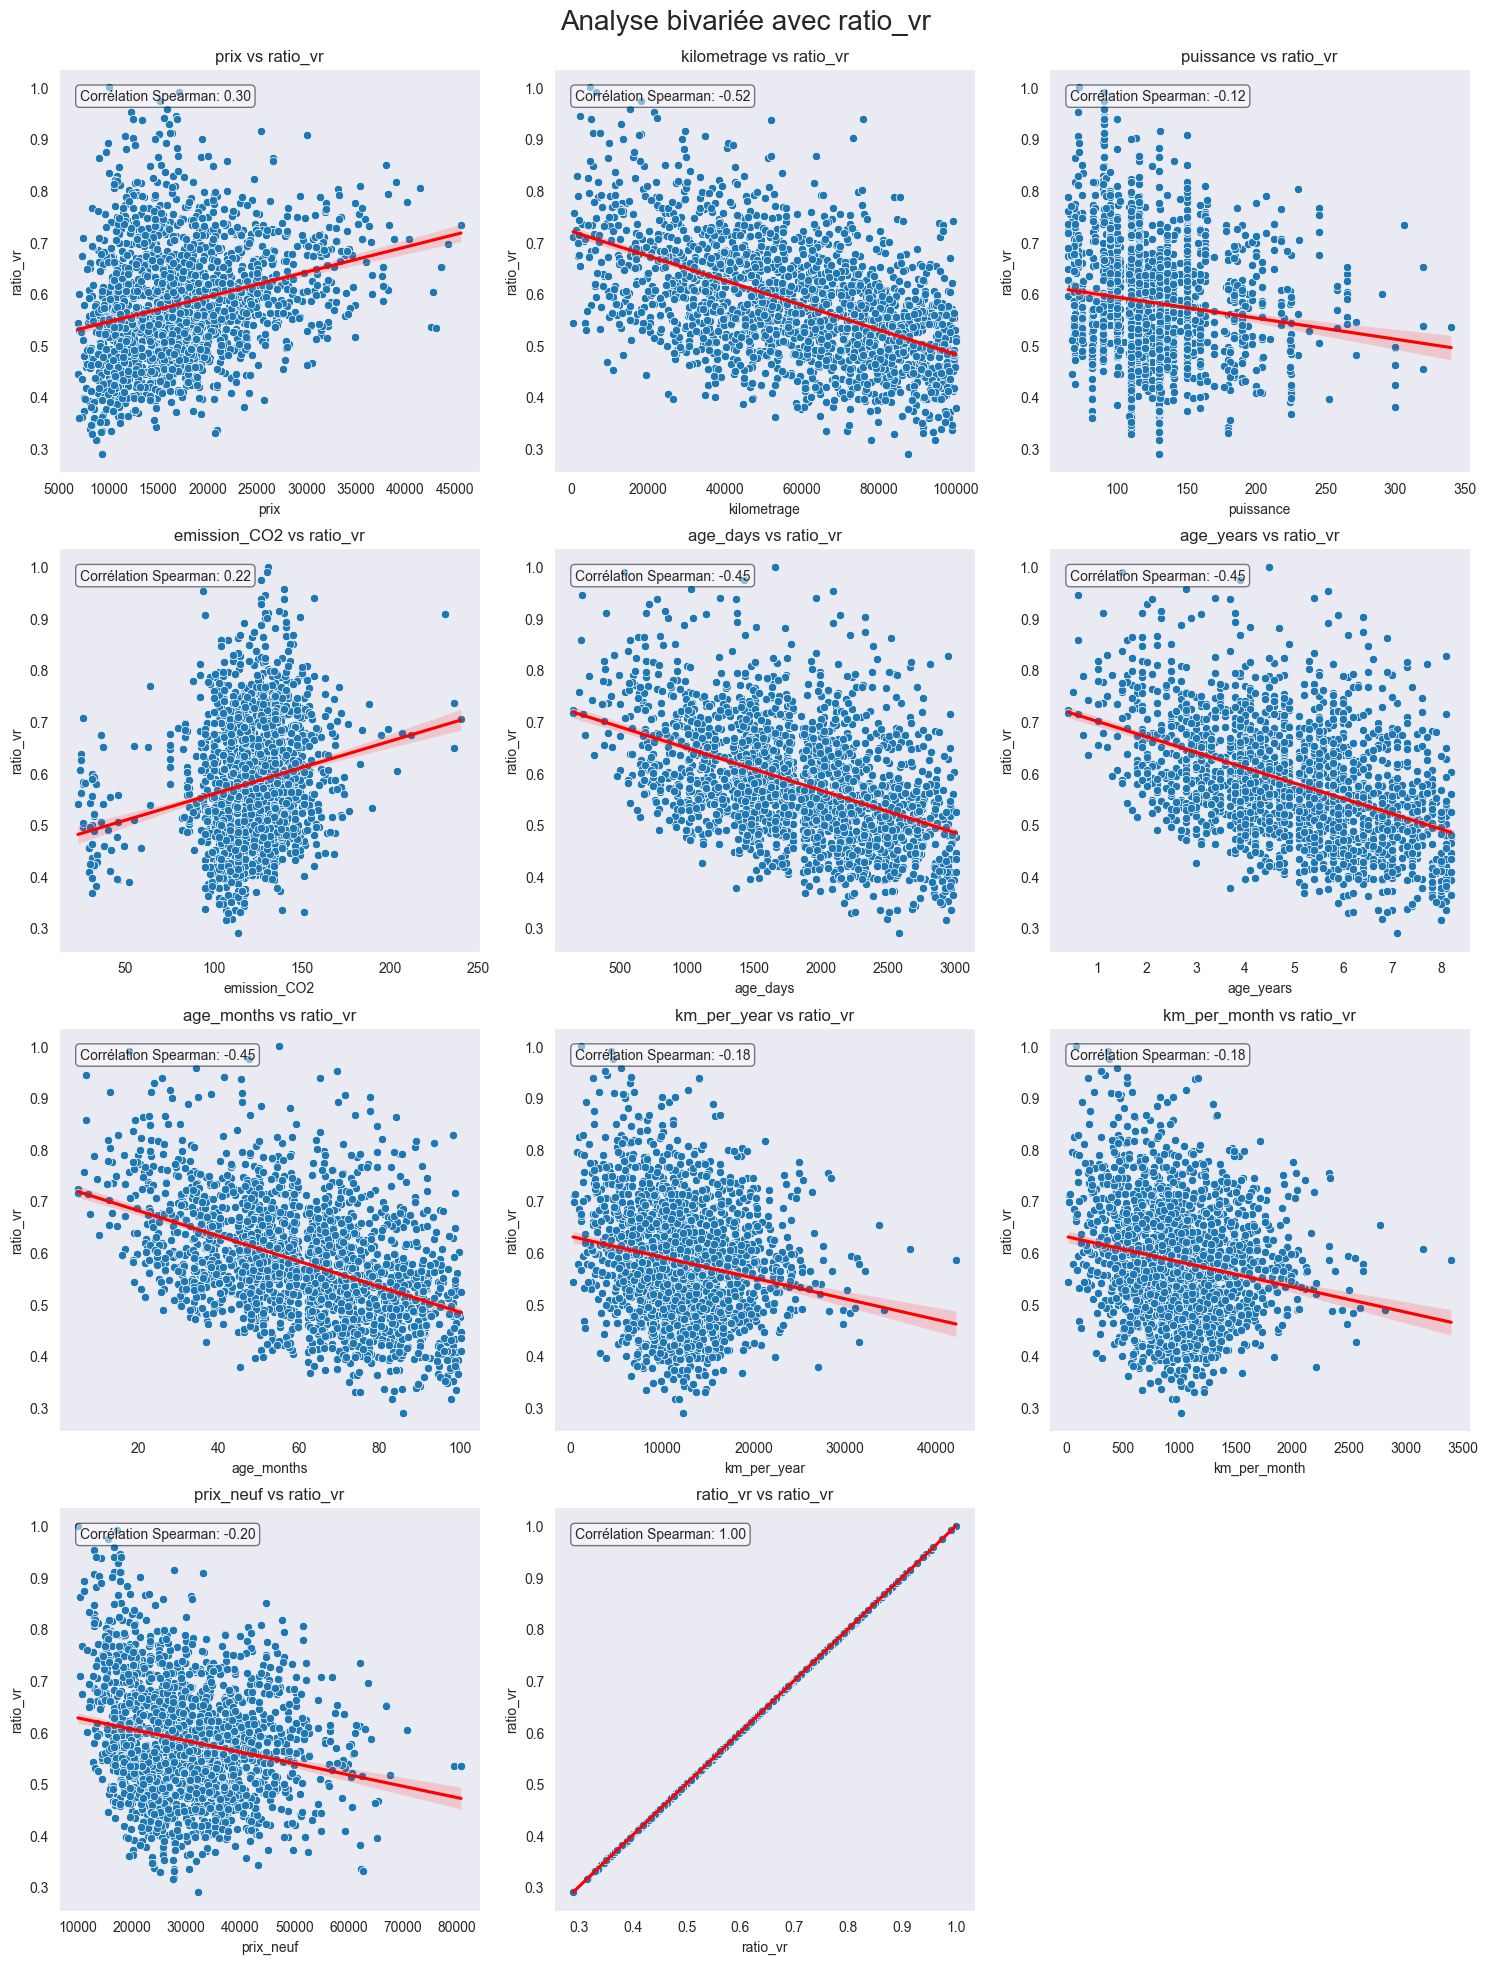

In [41]:
bivariate_analysis(df_preprocessed, list_columns=continuous_variables, dtype="num", target_column=target_variable)

### 4. Analyses multivariées

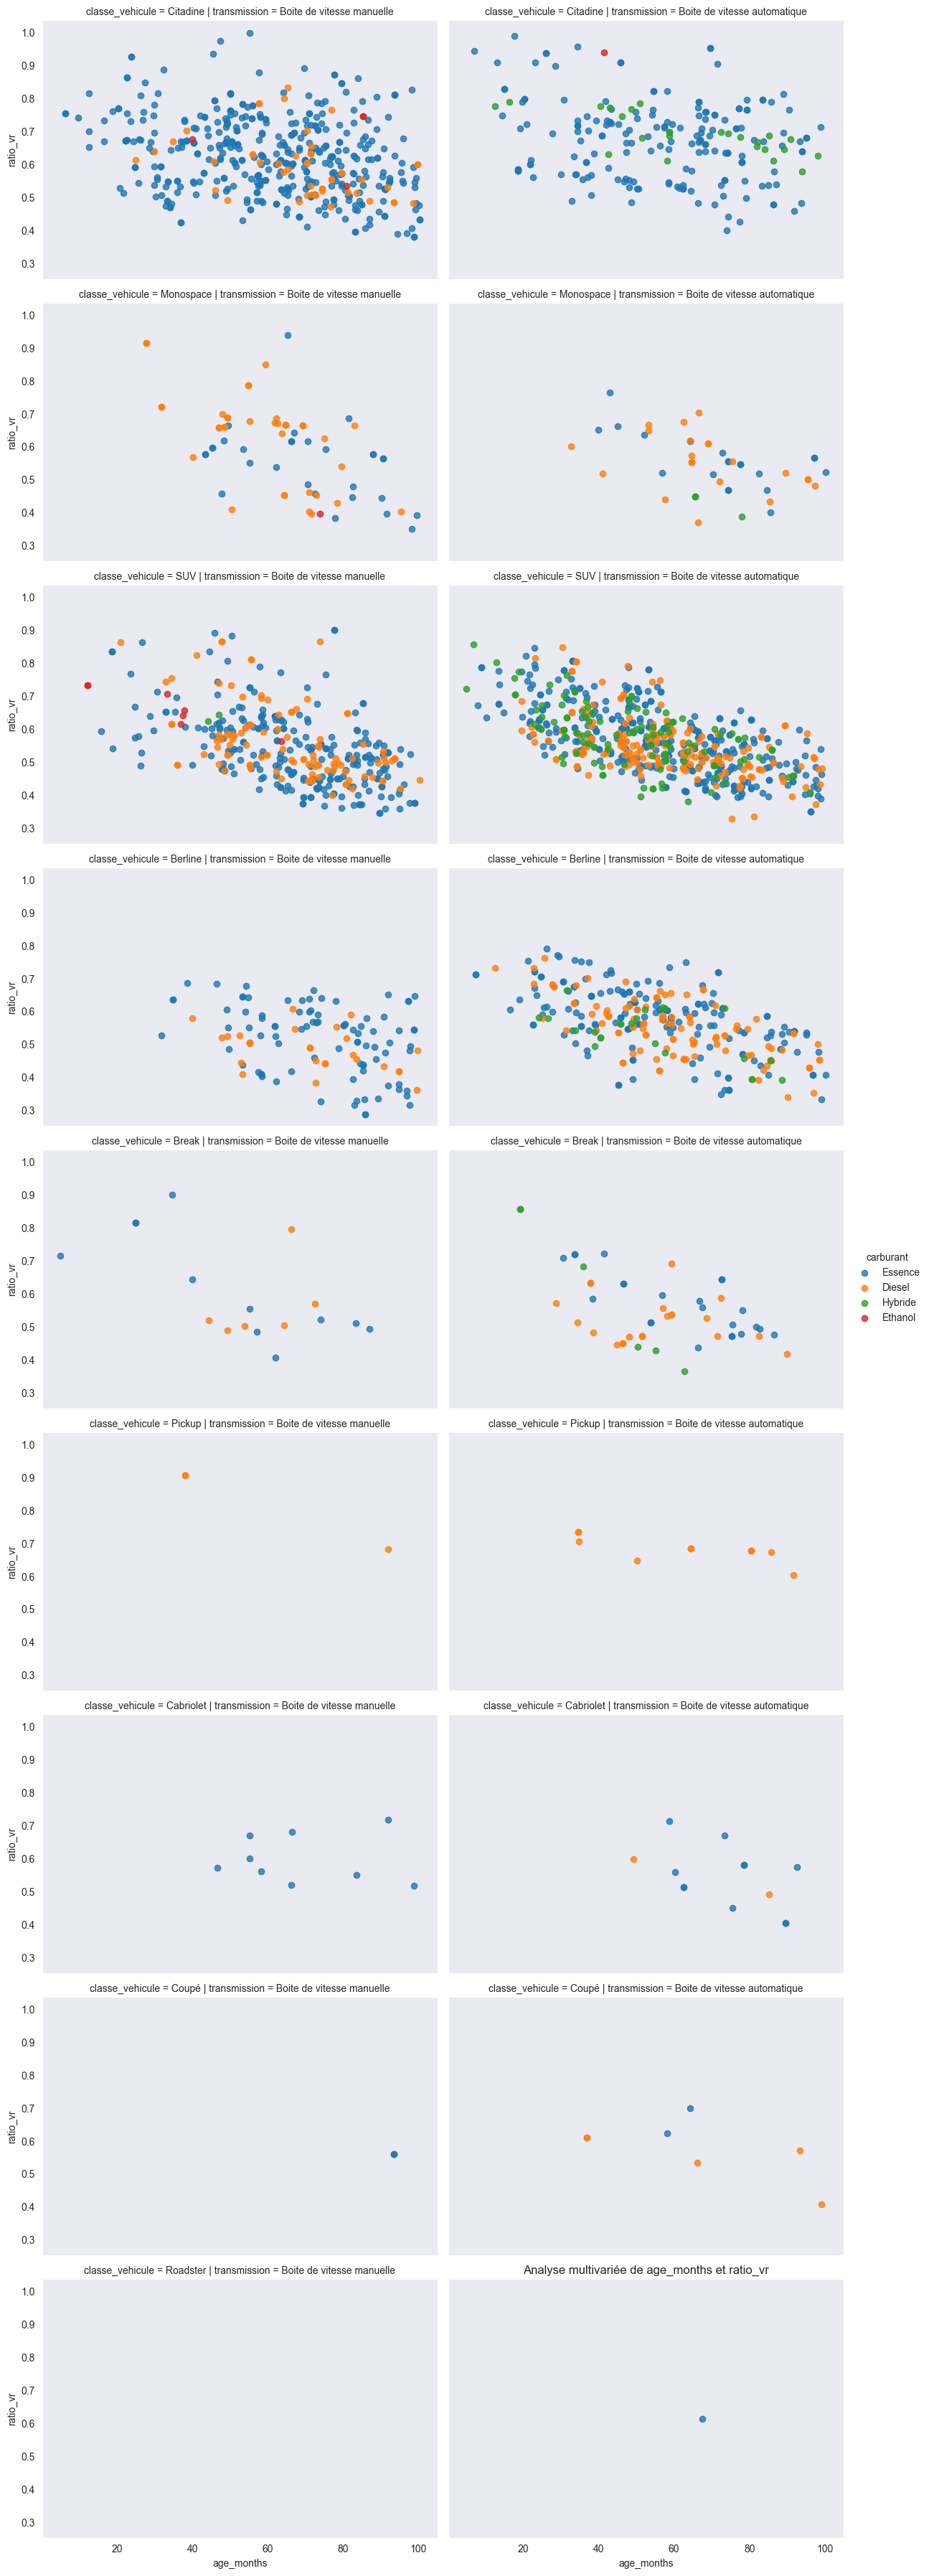

In [42]:
multivariate_analysis(df_preprocessed, x="age_months", y = target_variable, 
                      row="classe_vehicule", col="transmission", hue="carburant")

In [43]:
# Graphique de 3 dimensions avec Plotly: ratio_vr, age_months et kilometrage
fig = px.scatter_3d(df_preprocessed, x='age_months', y='kilometrage', z='ratio_vr',
                    color='carburant', opacity=0.7)

fig.update_layout(scene= dict(xaxis_title = "Age (mois)",
                              yaxis_title = "Kilométrage (km)",
                              zaxis_title = "Ratio VR"),
                  legend_title_text = "Carburant",
                  width = 800, height = 400,
                  margin=dict(l=0, r=0, b=0, t=0)
                 )
fig.show()

En général, Ratio VR en baisse avec l'augmentation de kilométrage parcouru et de l'âge du véhicule

## IV. Regroupement des modèles

In [44]:
df_preprocessed.columns

Index(['marque', 'modele', 'prix', 'kilometrage', 'carburant', 'transmission',
       'puissance', 'nb_ancien_proprietaire', 'classe_vehicule', 'nb_porte',
       'nb_place', 'couleur', 'sellerie', 'classe_emission', 'emission_CO2',
       'crit_air', 'usage_commerciale_anterieure', 'annee', 'age_days',
       'age_years', 'age_months', 'km_per_year', 'km_per_month', 'id_annonce',
       'prix_neuf', 'ratio_vr'],
      dtype='object')

In [45]:
# Nombre d'année group by modèle
df_preprocessed.groupby('modele').agg(nb_annonces = ('id_annonce', 'count'),
                                      nb_annee = ('annee', 'nunique'),
                                      year_min = ('annee', 'min'),
                                      year_max = ('annee', 'max')).sort_values(by='nb_annonces', ascending = False)

,nb_annonces,nb_annee,year_min,year_max
modele,,,,
PEUGEOT 2008,115,8,2017,2024
RENAULT CLIO,100,7,2017,2023
PEUGEOT 208,88,8,2017,2024
PEUGEOT 3008,82,8,2017,2024
CITROEN C3,63,7,2017,2024
...,...,...,...,...
TOYOTA PROACE,1,1,2021,2021
VOLKSWAGEN PASSAT,1,1,2019,2019
VOLKSWAGEN TIGUAN ALLSPACE,1,1,2022,2022


Il serait intéressant de regrouper les modèles homogènes:  
- Réduire la dimension: on a 221 modèles différents dans le dataset => Beaucoup de modalités en one hot encoding alors que les données ne sont pas forcément représentatives sur qq uns. En plus, one-hot encoding ne permet pas de voir la similarité entre les différents modèles  
- Gérer les nouveaux modèles de voiture qui ne sont pas encore dans le dataset actuel

In [ ]:
# Tout d'abord, faire un split des données en train et test
X = df_preprocessed.drop(columns=[target_variable])
y = df_preprocessed[target_variable]

# Stratifier selon l'année pour s'assurer que chaque année est représentée dans les ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=X['annee']
)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

In [ ]:
# Vérifier la stratification
print("Années dans l'ensemble d'entraînement :", sorted(X_train['annee'].unique()))
print("Années dans l'ensemble de test :", sorted(X_test['annee'].unique()))

In [ ]:
X_train.groupby('modele').agg(nb_annonces = ('id_annonce', 'count'),
                                      nb_annee = ('annee', 'nunique'),
                                      year_min = ('annee', 'min'),
                                      year_max = ('annee', 'max')).sort_values(by='nb_annonces', ascending = False)

In [ ]:
# Nombre d'unique modèles dans l'ensemble d'entraînement
unique_modele = X_train["modele"].unique()

## V. Modelling